In [ ]:
!pip install pingouin

In [37]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pingouin as pg
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('/content/enem-2022-df.csv')

In [39]:
df

ano inscricao_enem  nota_ch  nota_cn  nota_l  nota_m  nota_r  \
0      2022   211XXXXXX184    509.1    444.2   483.8   425.4   320.0   
1      2022   211XXXXXX280    405.5    399.4   488.2   372.5   340.0   
2      2022   211XXXXXX280    405.5    399.4   488.2   372.5   340.0   
3      2022   211XXXXXX280    405.5    399.4   488.2   372.5   340.0   
4      2022   211XXXXXX143    628.4    644.0   619.2   770.4   980.0   
...     ...            ...      ...      ...     ...     ...     ...   
42921  2022   211XXXXXX410    717.5    699.0   731.6   746.0   960.0   
42922  2022   211XXXXXX432    683.5    682.5   581.0   821.8   960.0   
42923  2022   211XXXXXX491    656.2    722.2   619.6   793.2   960.0   
42924  2022   211XXXXXX029    716.1    659.1   652.6   774.7   960.0   
42925  2022   211XXXXXX029    716.1    659.1   652.6   774.7   960.0   

      sigla_uf_campus  
0                  DF  
1                  DF  
2                  DF  
3                  DF  
4                  DF  
...               ...  
42921              DF  
42922              DF  
42923              DF  
42924              DF  
42925              DF  

[42926 rows x 8 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42926 entries, 0 to 42925
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ano              42926 non-null  int64  
 1   inscricao_enem   42926 non-null  object 
 2   nota_ch          42926 non-null  float64
 3   nota_cn          42926 non-null  float64
 4   nota_l           42926 non-null  float64
 5   nota_m           42926 non-null  float64
 6   nota_r           42926 non-null  float64
 7   sigla_uf_campus  42926 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB


In [41]:
# Renomeando as colunas para facilitar a visualização

df.rename(columns={'nota_ch': 'Ciências Humanas',
                       'nota_m': 'Matemática',
                       'nota_cn': 'Ciências da Natureza',
                       'nota_l': 'Linguagens',
                       'nota_r': 'Redação'},
              inplace=True)
df_num = df[['Ciências Humanas', 'Matemática', 'Ciências da Natureza', 'Linguagens', 'Redação']]

In [42]:
df_num

Ciências Humanas  Matemática  Ciências da Natureza  Linguagens  Redação
0                 509.1       425.4                 444.2       483.8    320.0
1                 405.5       372.5                 399.4       488.2    340.0
2                 405.5       372.5                 399.4       488.2    340.0
3                 405.5       372.5                 399.4       488.2    340.0
4                 628.4       770.4                 644.0       619.2    980.0
...                 ...         ...                   ...         ...      ...
42921             717.5       746.0                 699.0       731.6    960.0
42922             683.5       821.8                 682.5       581.0    960.0
42923             656.2       793.2                 722.2       619.6    960.0
42924             716.1       774.7                 659.1       652.6    960.0
42925             716.1       774.7                 659.1       652.6    960.0

[42926 rows x 5 columns]

In [43]:
df.isnull().sum()

ano                     0
inscricao_enem          0
Ciências Humanas        0
Ciências da Natureza    0
Linguagens              0
Matemática              0
Redação                 0
sigla_uf_campus         0
dtype: int64

In [44]:
df.dtypes

ano                       int64
inscricao_enem           object
Ciências Humanas        float64
Ciências da Natureza    float64
Linguagens              float64
Matemática              float64
Redação                 float64
sigla_uf_campus          object
dtype: object

In [45]:
df_num.describe()

Ciências Humanas    Matemática  Ciências da Natureza    Linguagens  \
count      42926.000000  42926.000000          42926.000000  42926.000000   
mean         545.015310    548.797621            508.127331    525.273727   
std           91.152535    113.461363             83.409191     74.064774   
min          318.000000    318.400000            311.700000    307.300000   
25%          478.200000    457.900000            445.600000    478.500000   
50%          551.000000    533.000000            499.200000    529.450000   
75%          608.800000    628.300000            563.600000    576.075000   
max          846.900000    953.100000            867.100000    775.800000   

            Redação  
count  42926.000000  
mean     650.348973  
std      140.895693  
min      200.000000  
25%      560.000000  
50%      620.000000  
75%      740.000000  
max      980.000000

In [46]:
fig = px.scatter(df_num,
                 x='Linguagens',
                 y='Matemática',
                 color='Redação',
                 color_continuous_scale='Blues',
                 trendline='ols')
fig.show()

In [47]:
fig = px.scatter(df_num,
                 x='Ciências Humanas',
                 y='Ciências da Natureza',
                 color='Redação',
                 color_continuous_scale='Reds',
                 trendline='ols')
fig.show()

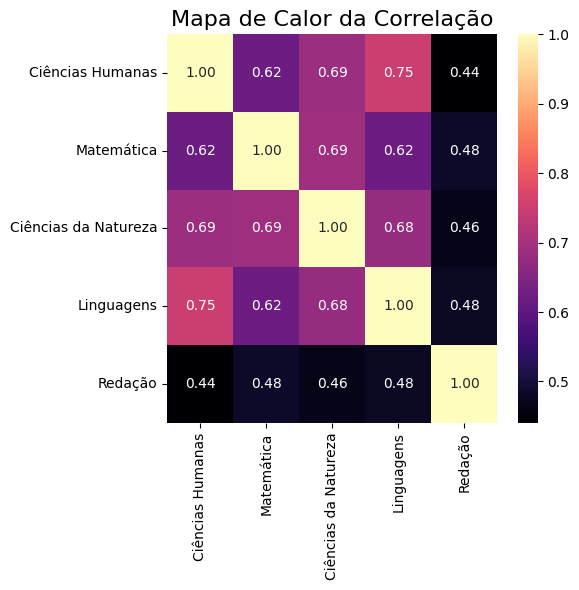

In [48]:
# Calcula a matriz de correlação
corr = df_num.corr()

# Configura o tamanho do gráfico
plt.figure(figsize=(6, 6))

# Cria o mapa de calor usando seaborn
sns.heatmap(
    corr,
    annot=True,         # Exibe os valores no mapa de calor
    fmt=".2f",          # Formato dos valores
    cmap="magma",       # Paleta de cores
    cbar=True           # Adiciona a barra de cores
)

# Adiciona título e ajusta o layout
plt.title("Mapa de Calor da Correlação", fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
matriz_corr = pg.rcorr(df_num, method = 'pearson', upper = 'pval',
                       decimals = 4,
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

print(matriz_corr)

                     Ciências Humanas Matemática Ciências da Natureza  \
Ciências Humanas                    -        ***                  ***   
Matemática                     0.6191          -                  ***   
Ciências da Natureza           0.6867      0.688                    -   
Linguagens                     0.7473     0.6216               0.6772   
Redação                        0.4406     0.4835               0.4649   

                     Linguagens Redação  
Ciências Humanas            ***     ***  
Matemática                  ***     ***  
Ciências da Natureza        ***     ***  
Linguagens                    -     ***  
Redação                  0.4764       -  


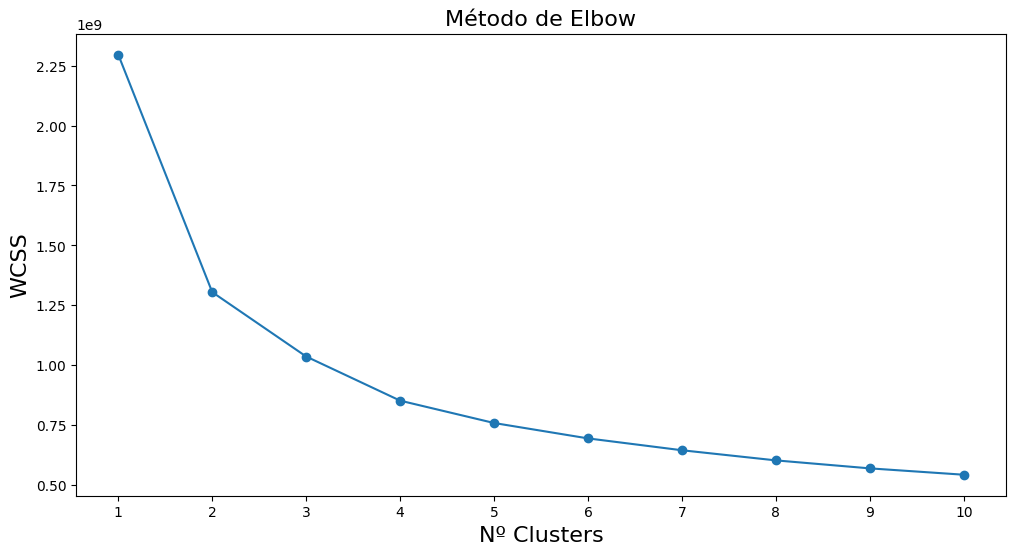

In [50]:
elbow = []
K = range(1,11) # testando até 10 clusters
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=42).fit(df_num)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(12,6))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

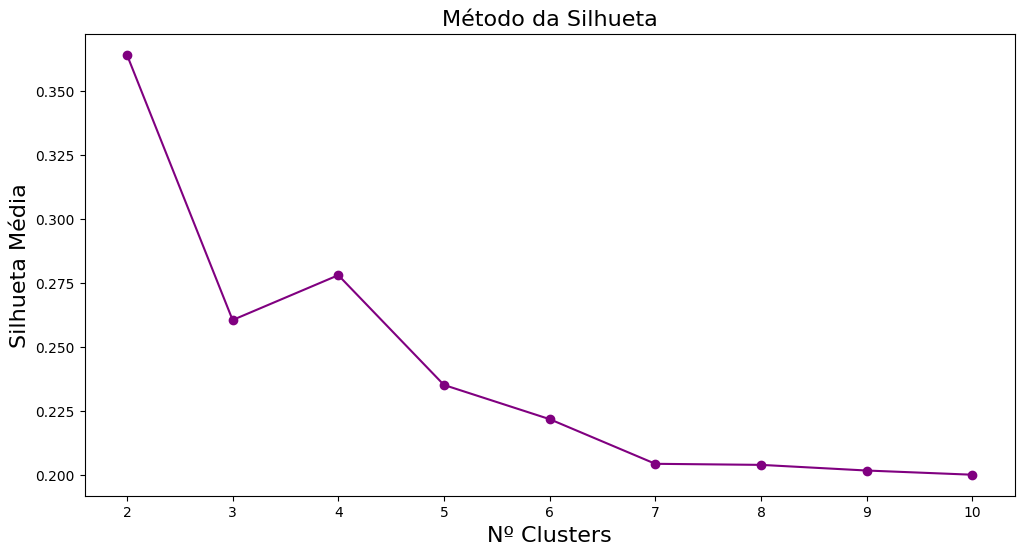

In [51]:
silhueta = []
I = range(2,11)
for i in I:
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=42).fit(df_num)
    silhueta.append(silhouette_score(df_num, kmeansSil.labels_))

plt.figure(figsize=(12,6))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.show()

In [52]:
#Optei por escolher 4 clusters

kmeans_final = KMeans(n_clusters = 4, init = 'random', random_state=42).fit(df_num)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
df['cluster_kmeans'] = kmeans_clusters

In [53]:
df.head()

ano inscricao_enem  Ciências Humanas  Ciências da Natureza  Linguagens  \
0  2022   211XXXXXX184             509.1                 444.2       483.8   
1  2022   211XXXXXX280             405.5                 399.4       488.2   
2  2022   211XXXXXX280             405.5                 399.4       488.2   
3  2022   211XXXXXX280             405.5                 399.4       488.2   
4  2022   211XXXXXX143             628.4                 644.0       619.2   

   Matemática  Redação sigla_uf_campus  cluster_kmeans  
0       425.4    320.0              DF               3  
1       372.5    340.0              DF               3  
2       372.5    340.0              DF               3  
3       372.5    340.0              DF               3  
4       770.4    980.0              DF               1

In [54]:
p_valor = pd.DataFrame({'Disciplina': df_num.columns, 'F': [None] * len(df_num.columns), 'p_valor': [None] * len(df_num.columns)})

for i, coluna in enumerate(df_num.columns):
    anova = pg.anova(dv=coluna,
                     between='cluster_kmeans',
                     data=df,
                     detailed=True)
    f_val = anova['F'].iloc[0]  # Seleciona o primeiro valor de p-unc
    p_valor.loc[i, 'F'] = f_val  # Seleciona o primeiro valor de p-unc
    p_val = anova['p-unc'].iloc[0]  # Seleciona o primeiro valor de p-unc
    p_valor.loc[i, 'p_valor'] = p_val

print(p_valor)

             Disciplina             F p_valor
0      Ciências Humanas   17344.19743     0.0
1            Matemática  24877.064793     0.0
2  Ciências da Natureza  19005.985901     0.0
3            Linguagens  15495.416781     0.0
4               Redação  34812.061775     0.0


In [55]:
pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}

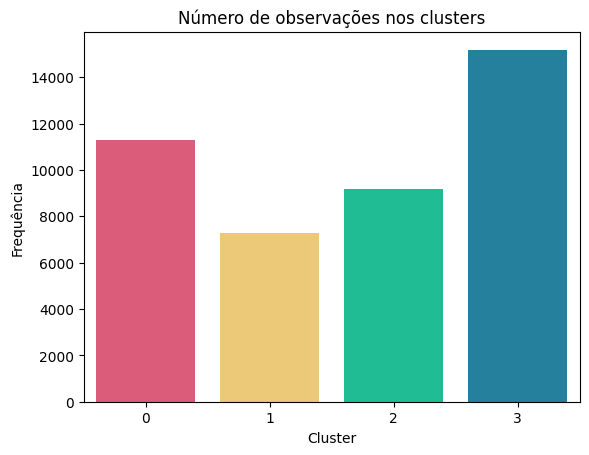

In [56]:
sns.countplot(x=df["cluster_kmeans"].sort_values().astype(str),
              palette=pal, dodge=False)
plt.title("Número de observações nos clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequência")
plt.show()

In [57]:
centroides = pd.DataFrame(kmeans_final.cluster_centers_)
centroides.columns = df_num.columns
centroides.index.name = 'cluster'
centroides

Ciências Humanas  Matemática  Ciências da Natureza  Linguagens  \
cluster                                                                   
0              590.355232  594.947211            537.392103  559.288146   
1              653.979736  712.046467            623.935290  610.448282   
2              524.418672  508.145367            481.284551  516.227066   
3              471.481142  460.775282            447.062732  464.586033   

            Redação  
cluster              
0        601.841360  
1        838.779214  
2        757.125749  
3        531.474524

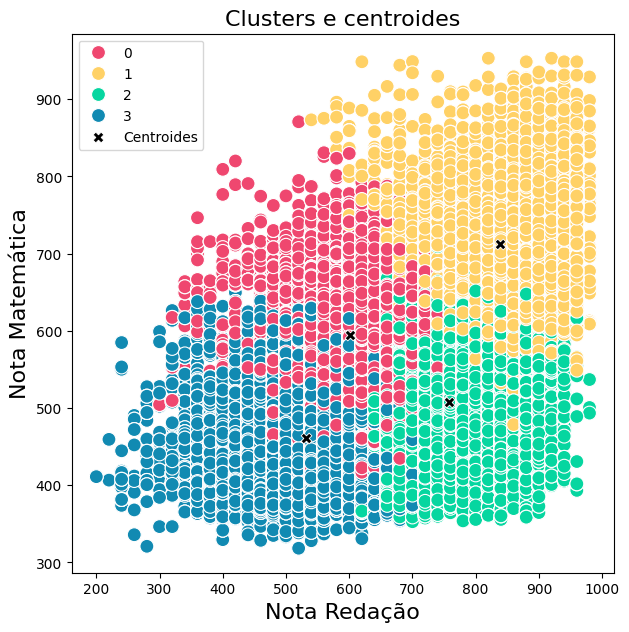

In [58]:
pal = {0: '#ef476f', 1: '#ffd166', 2: '#06d6a0', 3: '#118ab2', 4: '#7b1e7a'}

plt.figure(figsize=(7,7))
sns.scatterplot(x='Redação', y='Matemática', data=df, hue='cluster_kmeans', palette=pal, s=100)
sns.scatterplot(x='Redação', y='Matemática', data=centroides, s=60, c='black', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Nota Redação', fontsize=16)
plt.ylabel('Nota Matemática', fontsize=16)
plt.legend(loc='upper left')
plt.show()

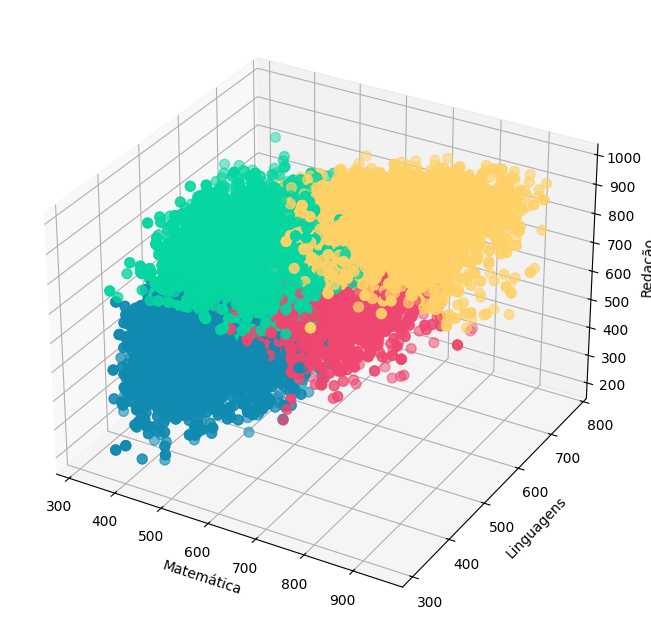

In [59]:
# Mapear as cores para cada ponto
cores = df["cluster_kmeans"].map(pal)

# Dados do gráfico
x = df['Matemática']
y = df['Linguagens']
z = df['Redação']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c=cores, marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Linguagens')
ax.set_zlabel('Redação')
plt.title("")

# Exibir o gráfico
plt.show()

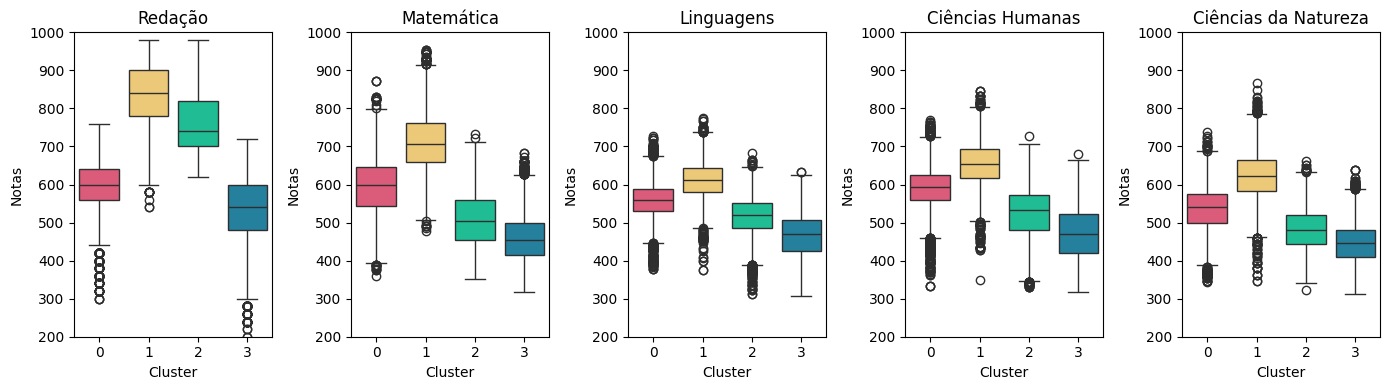

In [60]:
pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}


fig, axes = plt.subplots(1,5, figsize=(14, 4))  # Grade de 5x2 para os boxplots
axes = axes.flatten()  # Transforma os eixos em uma lista

disciplinas = ['Redação',
                'Matemática',
                'Linguagens',
                'Ciências Humanas',
                'Ciências da Natureza']

for i, disciplina in enumerate(disciplinas):
    sns.boxplot(
        x=df["cluster_kmeans"],
        y=df_num[disciplina],
        ax=axes[i],
        palette=pal
    )
    axes[i].set_title(disciplina)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Notas')
    axes[i].set_ylim(200, 1000)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()

In [61]:
df_num['cluster_kmeans'] = kmeans_clusters
df_num_group = df_num.groupby('cluster_kmeans')
df_num_group.describe().T

cluster_kmeans                         0            1            2  \
Ciências Humanas     count  11282.000000  7273.000000  9187.000000   
                     mean     590.394487   653.987172   524.439371   
                     std       54.798814    56.867995    65.800270   
                     min      334.600000   349.800000   330.200000   
                     25%      558.900000   616.600000   481.200000   
                     50%      592.800000   654.800000   533.700000   
                     75%      625.700000   692.400000   572.100000   
                     max      768.400000   846.900000   727.100000   
Matemática           count  11282.000000  7273.000000  9187.000000   
                     mean     595.111727   712.054833   508.114967   
                     std       72.761436    76.418963    70.529369   
                     min      358.500000   478.600000   352.700000   
                     25%      543.600000   658.000000   454.700000   
                     50%      598.500000   707.000000   504.400000   
                     75%      646.300000   761.300000   560.000000   
                     max      870.800000   953.100000   731.800000   
Ciências da Natureza count  11282.000000  7273.000000  9187.000000   
                     mean     537.430349   623.938801   481.307826   
                     std       55.650196    62.333969    54.406842   
                     min      343.600000   346.200000   323.300000   
                     25%      500.100000   583.600000   443.100000   
                     50%      541.000000   622.100000   480.300000   
                     75%      575.475000   665.200000   519.000000   
                     max      738.100000   867.100000   663.100000   
Linguagens           count  11282.000000  7273.000000  9187.000000   
                     mean     559.327034   610.451368   516.241112   
                     std       44.344156    48.444998    49.803294   
                     min      379.100000   375.600000   313.400000   
                     25%      531.400000   579.400000   485.700000   
                     50%      560.000000   610.600000   520.600000   
                     75%      588.600000   642.400000   550.350000   
                     max      726.700000   775.800000   682.700000   
Redação              count  11282.000000  7273.000000  9187.000000   
                     mean     601.887963   838.795545   757.098073   
                     std       68.565006    78.581911    76.826787   
                     min      300.000000   540.000000   620.000000   
                     25%      560.000000   780.000000   700.000000   
                     50%      600.000000   840.000000   740.000000   
                     75%      640.000000   900.000000   820.000000   
                     max      760.000000   980.000000   980.000000   

cluster_kmeans                         3  
Ciências Humanas     count  15184.000000  
                     mean     471.550540  
                     std       64.951104  
                     min      318.000000  
                     25%      421.300000  
                     50%      471.200000  
                     75%      522.100000  
                     max      681.200000  
Matemática           count  15184.000000  
                     mean     460.801449  
                     std       59.571786  
                     min      318.400000  
                     25%      415.200000  
                     50%      453.500000  
                     75%      499.700000  
                     max      682.000000  
Ciências da Natureza count  15184.000000  
                     mean     447.108977  
                     std       49.944105  
                     min      311.700000  
                     25%      410.500000  
                     50%      445.500000  
                     75%      481.500000  
                     max      639.000000  
Linguagens           count  15184.000000  
           